# Tree Methods
For this project we will be exploring the use of tree methods to classify schools as Private or Public based off their features.
Let's start by getting the data which is included in the ISLR library, the College data frame.  

A data frame with 777 observations on the following 18 variables.
+ Private A factor with levels No and Yes indicating private or public university
+ Apps Number of applications received
+ Accept Number of applications accepted
+ Enroll Number of new students enrolled
+ Top10perc Pct. new students from top 10% of H.S. class
+ Top25perc Pct. new students from top 25% of H.S. class
+ F.Undergrad Number of fulltime undergraduates
+ P.Undergrad Number of parttime undergraduates
+ Outstate Out-of-state tuition
+ Room.Board Room and board costs
+ Books Estimated book costs
+ Personal Estimated personal spending
+ PhD Pct. of faculty with Ph.D.’s
+ Terminal Pct. of faculty with terminal degree
+ S.F.Ratio Student/faculty ratio
+ perc.alumni Pct. alumni who donate
+ Expend Instructional expenditure per student
+ Grad.Rate Graduation rate

In [2]:
#install.packages('ISLR', repos='http://cran.us.r-project.org')

In [3]:
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 3.3.3"

In [4]:
df <- College
head(df)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [5]:
library(ggplot2)

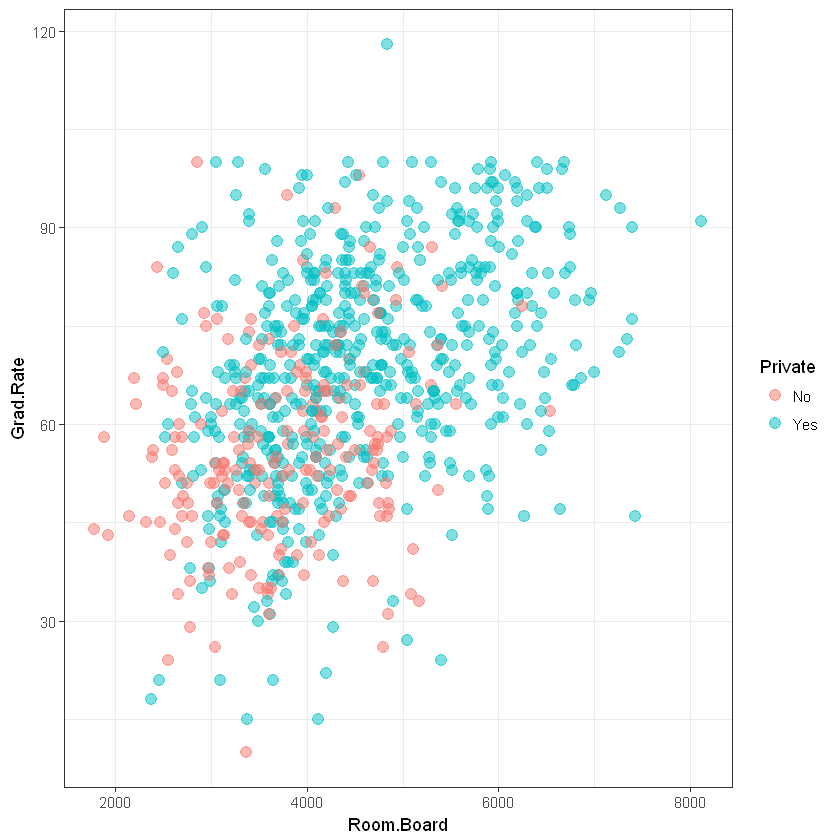

In [6]:
ggplot(df, aes(Room.Board, Grad.Rate)) + geom_point(aes(color=Private), size=3, alpha=0.5) + theme_bw()

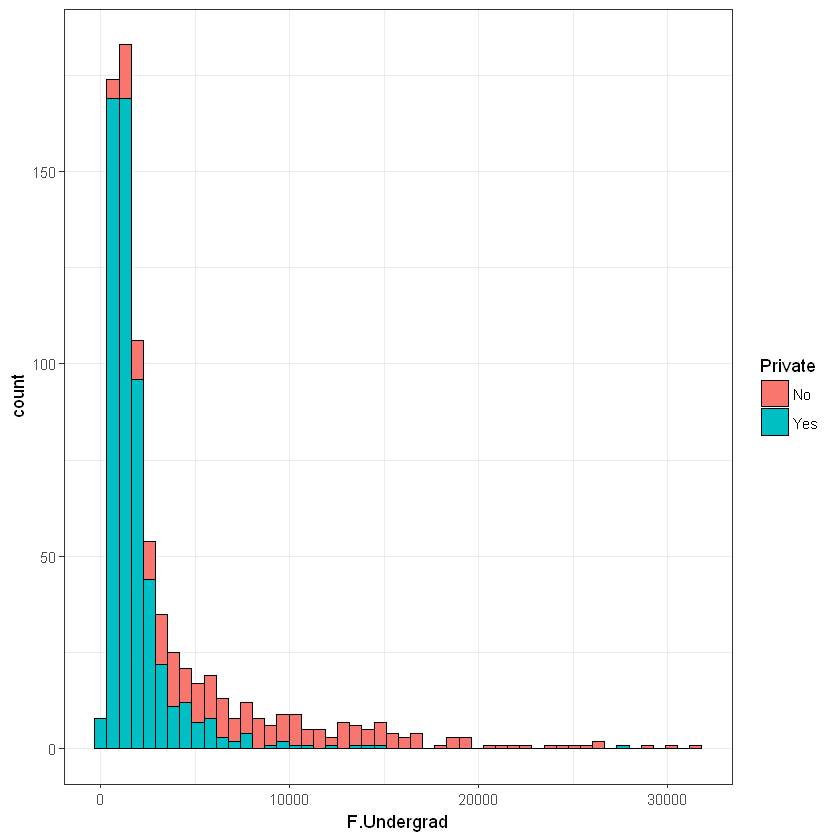

In [7]:
ggplot(df, aes(F.Undergrad)) + geom_histogram(aes(fill=Private), color='black', bins = 50) + theme_bw()

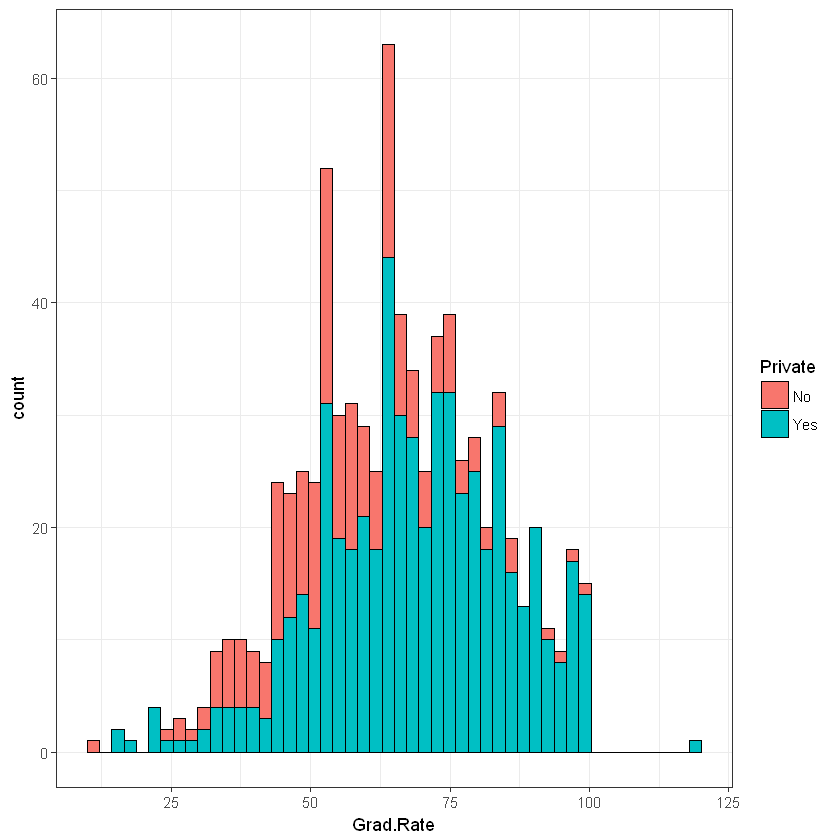

In [8]:
ggplot(df, aes(Grad.Rate)) + geom_histogram(aes(fill=Private), color='black', bins = 50) + theme_bw()

In [9]:
library(dplyr)
filter(df, Grad.Rate > 100)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [10]:
library(caTools)

## Decision Tree

In [11]:
library(rpart)

In [12]:
rownames(df)[df$Grad.Rate > 100]

[1] "Cazenovia College"

In [13]:
#df[df$Grad.Rate > 100,]$Grad.Rate <- 100
#df[df$Grad.Rate > 100,]
df['Cazenovia College', 'Grad.Rate'] <- 100

In [14]:
#df[rownames(df)=='Cazenovia College',]
df['Cazenovia College',]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,100


In [15]:
set.seed(101)
sample <- sample.split(df$Private, SplitRatio = 0.7)

In [16]:
train <- df[sample==T,]
dim(train)

[1] 544  18

In [17]:
test <- df[sample==F,]
dim(test)

[1] 233  18

In [18]:
tree <- rpart(Private ~ ., method = 'class', data = train)
printcp(tree)


Classification tree:
rpart(formula = Private ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] Accept      Enroll      F.Undergrad Outstate    P.Undergrad Top10perc  

Root node error: 148/544 = 0.27206

n= 544 

        CP nsplit rel error  xerror     xstd
1 0.486486      0   1.00000 1.00000 0.070132
2 0.216216      1   0.51351 0.60811 0.058558
3 0.027027      2   0.29730 0.39189 0.048637
4 0.020270      3   0.27027 0.40541 0.049367
5 0.010000      8   0.15541 0.41216 0.049725


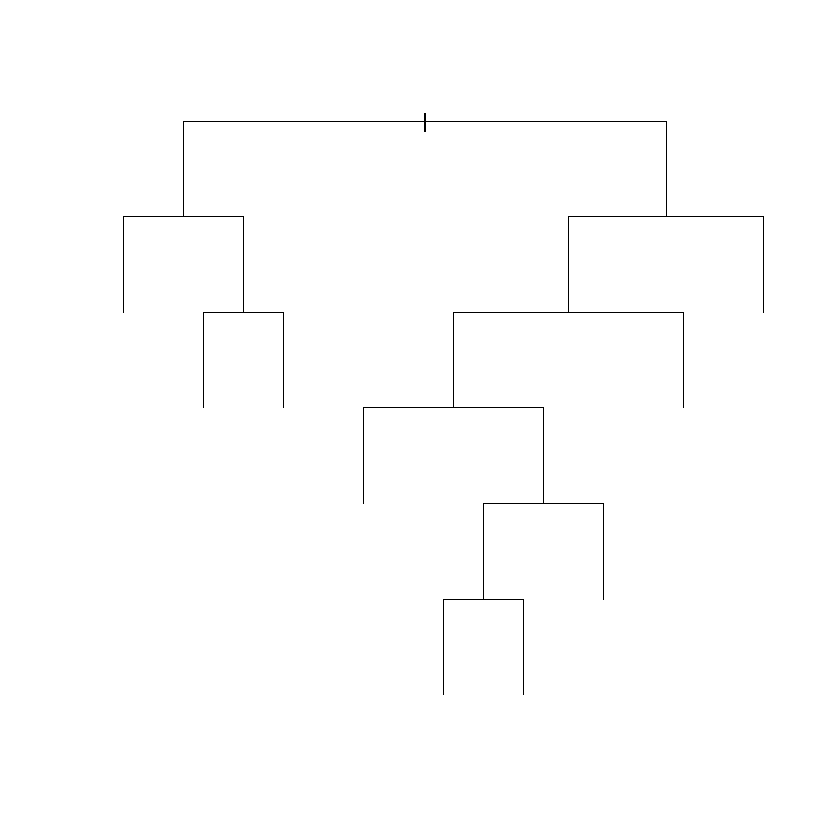

In [19]:
plot(tree, uniform = T)

In [20]:
#install.packages('rpart.plot', repos='http://cran.us.r-project.org')

Warning message:
"package 'rpart.plot' was built under R version 3.3.3"

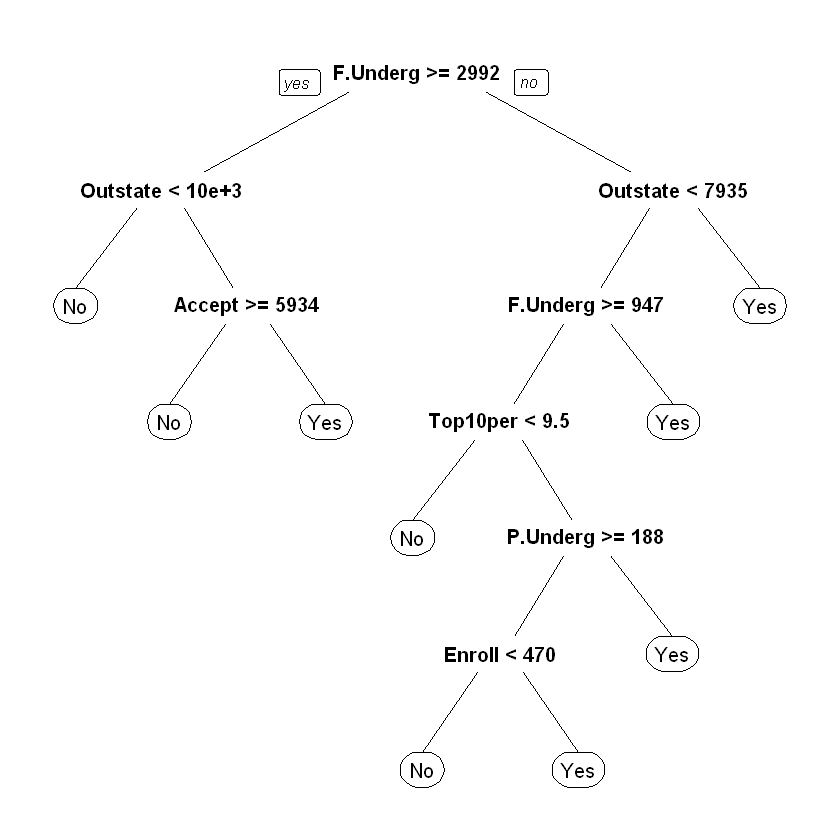

In [21]:
library(rpart.plot)
prp(tree)

In [22]:
test.data <- select(test, -Private)
test.label <- select(test, Private)

In [23]:
pred <- predict(tree, test.data, type = 'prob')

In [24]:
head(pred)

,No,Yes
Adrian College,0.003311258,0.9966887
Alfred University,0.003311258,0.9966887
Allegheny College,0.003311258,0.9966887
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887
Alma College,0.003311258,0.9966887
Amherst College,0.003311258,0.9966887


In [25]:
pred <- data.frame(pred)
class(pred)

[1] "data.frame"

In [26]:
pred$Private <- ifelse(pred$Yes > pred$No, 'Yes', 'No')
pred <- select(pred, Private)

In [27]:
head(pred)

,Private
Adrian College,Yes
Alfred University,Yes
Allegheny College,Yes
Allentown Coll. of St. Francis de Sales,Yes
Alma College,Yes
Amherst College,Yes


In [28]:
cm <- table(test.label$Private, pred$Private)
cm

     
       No Yes
  No   57   7
  Yes   9 160

## Random Forest

In [29]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [30]:
rf <- randomForest(Private ~ ., data = train, importance = T)

In [31]:
rf$confusion

,No,Yes,class.error
No,125,23,0.15540541
Yes,10,386,0.02525253


In [32]:
rf$importance

,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
Apps,0.030638008,0.0138490702,0.0183834770,8.191846
Accept,0.031590637,0.0157698867,0.0199998841,13.280573
Enroll,0.036691206,0.0284928559,0.0307724157,20.832978
Top10perc,0.008783509,0.0041456953,0.0053787323,5.250942
Top25perc,0.007412220,0.0044694518,0.0052145181,4.501693
F.Undergrad,0.154011049,0.0748721489,0.0962450156,40.463681
P.Undergrad,0.048475334,0.0073411365,0.0184278295,15.656301
Outstate,0.141095168,0.0613496370,0.0830099419,42.602561
Room.Board,0.021518748,0.0144101817,0.0163546192,11.415365
Books,0.001852497,0.0002509989,0.0007121824,2.248328


In [33]:
pred_rf <- predict(rf, test.data, type = 'prob')

In [34]:
head(pred_rf)

,No,Yes
Adrian College,0.000,1.000
Alfred University,0.000,1.000
Allegheny College,0.000,1.000
Allentown Coll. of St. Francis de Sales,0.002,0.998
Alma College,0.060,0.940
Amherst College,0.044,0.956


In [35]:
pred_rf <- data.frame(pred_rf)
pred_rf$Private <- ifelse(pred_rf$Yes > pred_rf$No, 'Yes', 'No')
pred_rf <- select(pred_rf, Private)
head(pred_rf)

,Private
Adrian College,Yes
Alfred University,Yes
Allegheny College,Yes
Allentown Coll. of St. Francis de Sales,Yes
Alma College,Yes
Amherst College,Yes


In [36]:
cm_rf <- table(test.label$Private, pred_rf$Private)
cm_rf

     
       No Yes
  No   58   6
  Yes   7 162

In [39]:
raw_pred_rf <- predict(rf, test)
head(raw_pred_rf)

Adrian College                       Alfred University 
                                    Yes                                     Yes 
                      Allegheny College Allentown Coll. of St. Francis de Sales 
                                    Yes                                     Yes 
                           Alma College                         Amherst College 
                                    Yes                                     Yes 
Levels: No Yes

In [42]:
table(test.label$Private, raw_pred_rf)

     raw_pred_rf
       No Yes
  No   58   6
  Yes   7 162

In [44]:
table(raw_pred_rf, test$Private)

           
raw_pred_rf  No Yes
        No   58   7
        Yes   6 162

In [41]:
tree_pred <- predict(tree, test)
head(tree_pred)

,No,Yes
Adrian College,0.003311258,0.9966887
Alfred University,0.003311258,0.9966887
Allegheny College,0.003311258,0.9966887
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887
Alma College,0.003311258,0.9966887
Amherst College,0.003311258,0.9966887
